In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report, mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import plot_tree

In [4]:
wine_df = pd.read_csv('../data/winequality-red.csv')
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
wine_df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [7]:
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

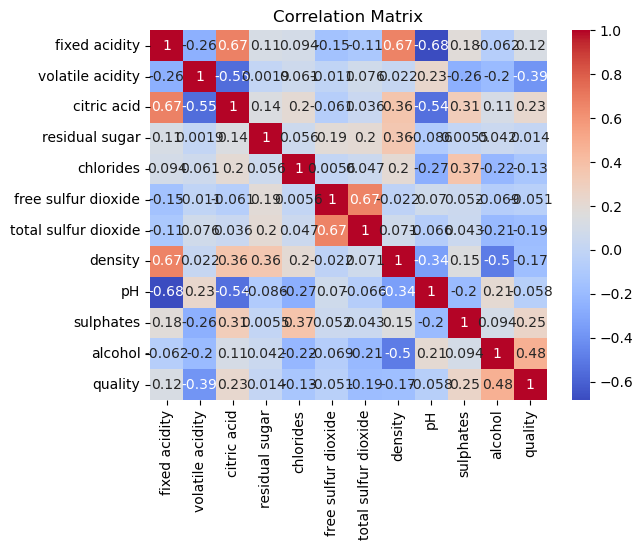

In [8]:
corr_matrix = wine_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

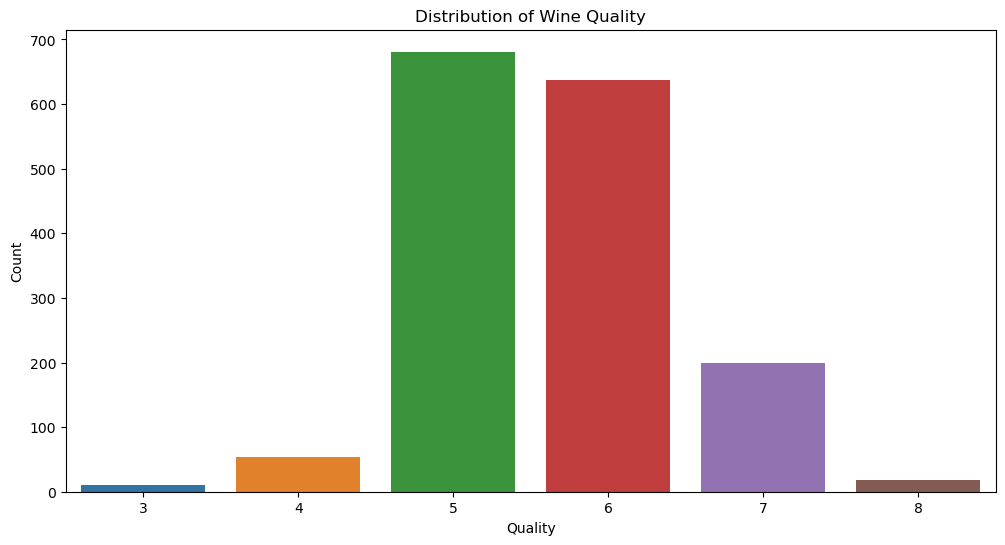

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(x='quality', data=wine_df)
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

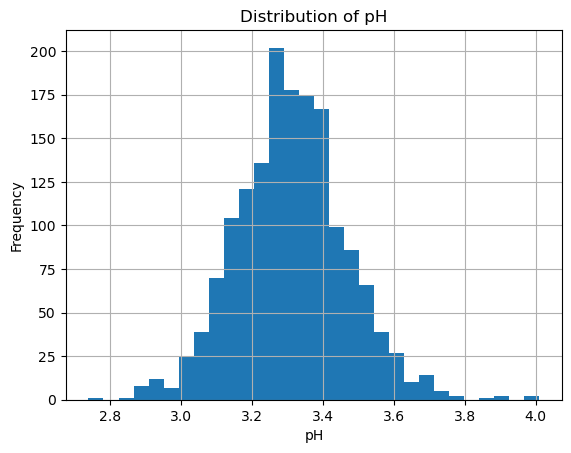

In [10]:
wine_df['pH'].hist(bins=30)
plt.title('Distribution of pH')
plt.xlabel('pH')
plt.ylabel('Frequency')
plt.show()

In [11]:
x = wine_df.drop('quality', axis=1)
y = wine_df['quality']

x.round()
y.round()


0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.15, random_state= 42)

#Experiment 1a: Decision Tree Classifer

In [13]:
wine_model = DecisionTreeClassifier(max_depth=8, random_state=42, min_samples_split=3, min_samples_leaf=6)
wine_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=6, min_samples_split=3,
                       random_state=42)

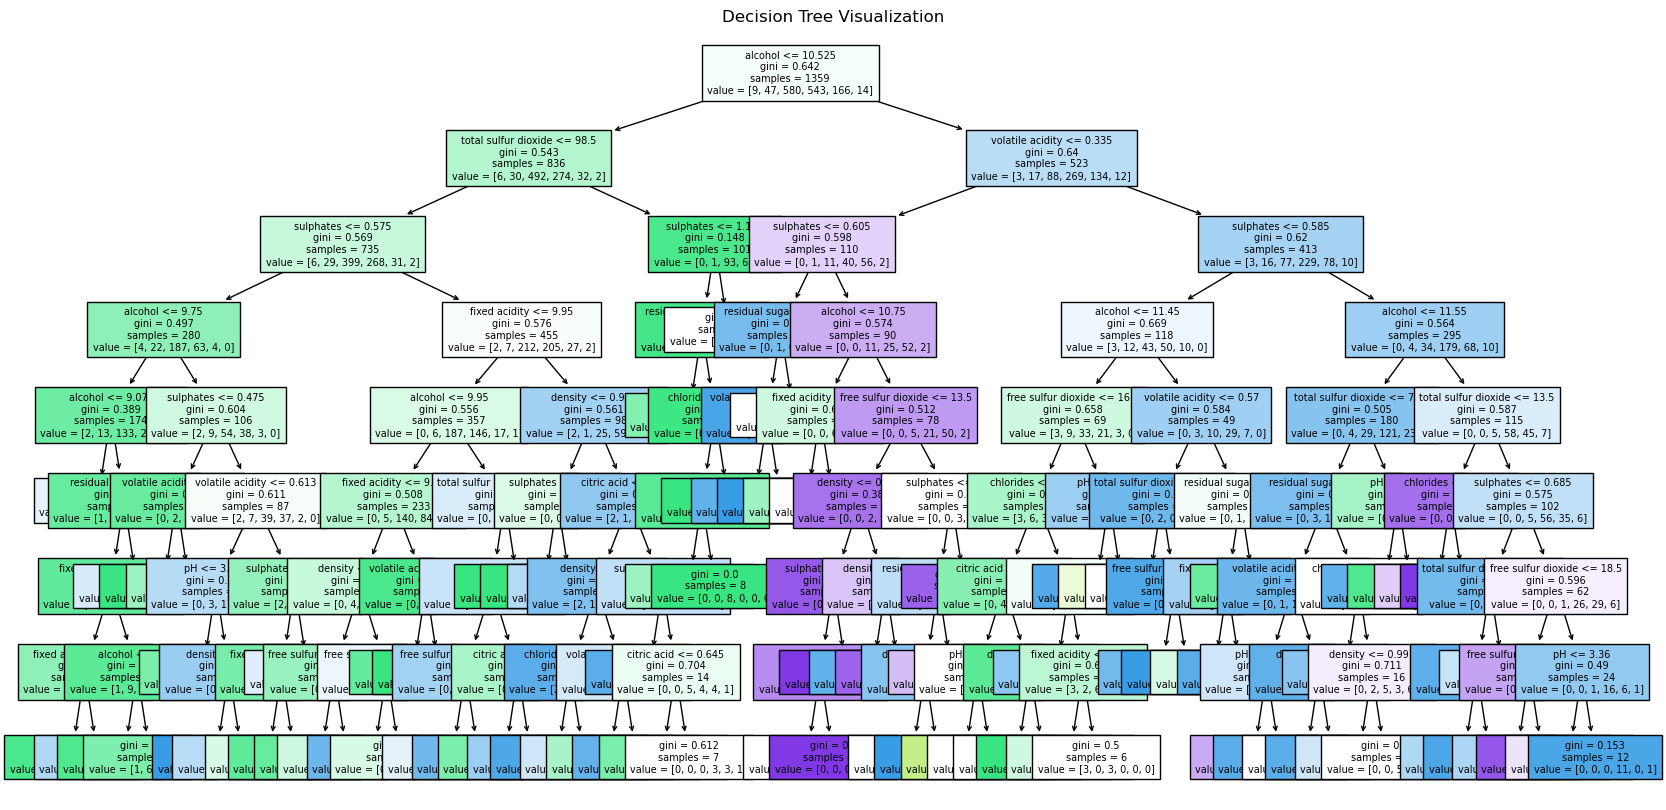

In [21]:
plt.figure(figsize=(20, 10))
plot_tree(wine_model, feature_names=list(x.columns.values), filled=True, fontsize=7)
plt.title("Decision Tree Visualization")
plt.show()

In [22]:
wine_model.score(x_train, y_train)

0.7358351729212657

In [23]:
y_train_pred = pd.DataFrame(wine_model.predict(x_train), columns = ['quality'])
y_test_pred = pd.DataFrame(wine_model.predict(x_test))

In [24]:
y_train_pred.head(10)

,quality
0,5
1,5
2,6
3,7
4,5
5,6
6,6
7,6
8,6
9,5


In [25]:
y_test_pred.head(10)

,0
0,5
1,5
2,6
3,6
4,6
5,5
6,5
7,5
8,5
9,6


In [26]:
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print('Classification Report: \n', classification_report(y_test, y_test_pred))

Training Accuracy: 0.7358351729212657
Test Accuracy: 0.5875
Classification Report: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         6
           5       0.63      0.75      0.69       101
           6       0.55      0.57      0.56        95
           7       0.61      0.33      0.43        33
           8       0.00      0.00      0.00         4

    accuracy                           0.59       240
   macro avg       0.30      0.28      0.28       240
weighted avg       0.57      0.59      0.57       240



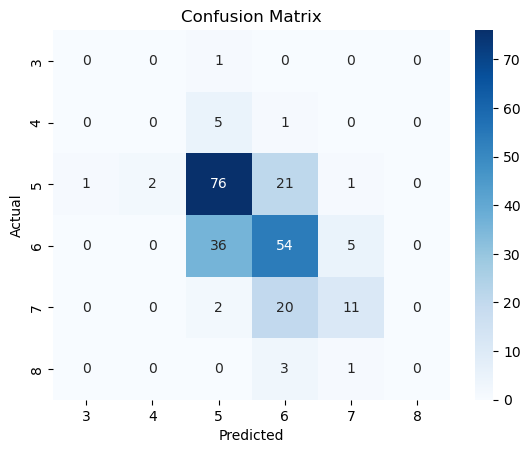

In [27]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['3', '4', '5', '6', '7', '8'], yticklabels=['3', '4', '5', '6', '7', '8'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

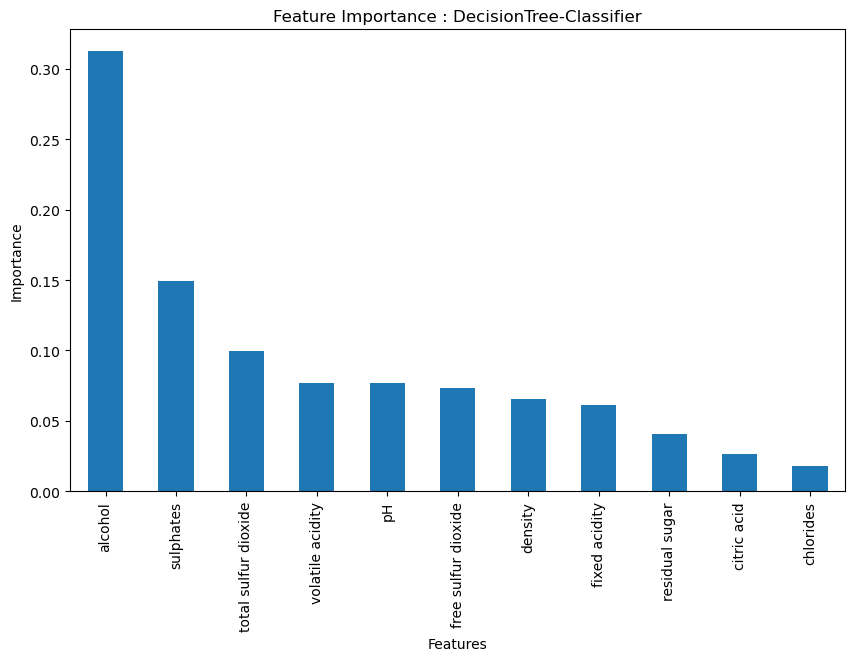

In [28]:
importances = pd.Series(wine_model.feature_importances_, index=x.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6), title='Feature Importance : DecisionTree-Classifier')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

#Experiment 1b: Random Forest Classifer

In [29]:
wine_rmodel = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=16, min_samples_split=3, min_samples_leaf=2)
wine_rmodel.fit(x_train, y_train)

RandomForestClassifier(max_depth=16, min_samples_leaf=2, min_samples_split=3,
                       random_state=42)

In [30]:
wine_rmodel.score(x_train, y_train)

0.9742457689477557

In [31]:
y_train_pred = pd.DataFrame(wine_rmodel.predict(x_train), columns = ['quality'])
y_test_pred = pd.DataFrame(wine_rmodel.predict(x_test), columns=['quality'])

In [32]:
y_train_pred.head(10)

,quality
0,5
1,5
2,6
3,7
4,6
5,7
6,5
7,6
8,6
9,5


In [33]:
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print('Classification Report: \n', classification_report(y_test, y_test_pred))

Training Accuracy: 0.9742457689477557
Test Accuracy: 0.6625
Classification Report: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         6
           5       0.74      0.80      0.77       101
           6       0.62      0.67      0.64        95
           7       0.52      0.42      0.47        33
           8       0.00      0.00      0.00         4

    accuracy                           0.66       240
   macro avg       0.31      0.32      0.31       240
weighted avg       0.63      0.66      0.64       240



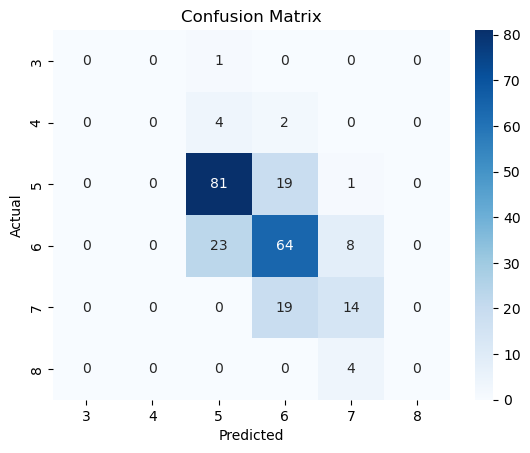

In [34]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['3', '4', '5', '6', '7', '8'], yticklabels=['3', '4', '5', '6', '7', '8'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Experiment 2a: Random Forest Regressor

In [35]:
wine_Rrmodel = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=14, min_samples_leaf=1)
wine_Rrmodel.fit(x_train, y_train)

RandomForestRegressor(max_depth=14, random_state=42)

In [36]:
wine_Rrmodel.score(x_train, y_train)

0.9111268099643666

In [37]:
y_train_pred = pd.DataFrame(wine_Rrmodel.predict(x_train), columns = ['quality'])
y_test_pred = pd.DataFrame(wine_Rrmodel.predict(x_test), columns=['quality'])

y_train_pred = y_train_pred.round()
y_test_pred = y_test_pred.round()

In [38]:
y_train_pred.head(10)

,quality
0,5.0
1,5.0
2,6.0
3,7.0
4,6.0
5,7.0
6,5.0
7,6.0
8,6.0
9,5.0


In [39]:
y_test_pred.head(10)

,quality
0,5.0
1,5.0
2,5.0
3,5.0
4,6.0
5,5.0
6,5.0
7,5.0
8,6.0
9,6.0


In [41]:
print('Mean Squared Error: ', mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_test_pred))
print('R2 Score: ', r2_score(y_test, y_test_pred))

Mean Squared Error:  0.4166666666666667
Root Mean Squared Error:  0.6454972243679028
Mean Absolute Error:  0.375
R2 Score:  0.373286329808069


In [42]:
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print('Classification Report: \n', classification_report(y_test, y_test_pred))

Training Accuracy: 0.94186902133922
Test Accuracy: 0.6458333333333334
Classification Report: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         6
           5       0.72      0.83      0.77       101
           6       0.58      0.63      0.61        95
           7       0.55      0.33      0.42        33
           8       0.00      0.00      0.00         4

    accuracy                           0.65       240
   macro avg       0.31      0.30      0.30       240
weighted avg       0.61      0.65      0.62       240



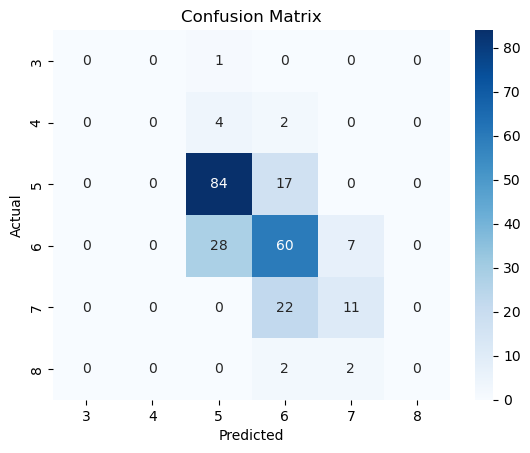

In [43]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['3', '4', '5', '6', '7', '8'], yticklabels=['3', '4', '5', '6', '7', '8'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Experiment 2b: Decision Tree Regressor

In [44]:
wine_Dtmodel = DecisionTreeRegressor(random_state=42)
wine_Dtmodel.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [45]:
plt.figure(figsize=(20, 10))
plot_tree(wine_model, feature_names=x.columns, filled=True, fontsize=7)
plt.title("Decision Tree Visualization")
plt.show()

InvalidParameterError: The 'feature_names' parameter of plot_tree must be an instance of 'list' or None. Got Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object') instead.

<Figure size 2000x1000 with 0 Axes>

In [46]:
wine_Dtmodel.score(x_train, y_train)

1.0

In [47]:
y_train_pred = pd.DataFrame(wine_Dtmodel.predict(x_train), columns = ['quality'])
y_test_pred = pd.DataFrame(wine_Dtmodel.predict(x_test), columns=['quality'])

y_train_pred = y_train_pred.round()
y_test_pred = y_test_pred.round()

In [48]:
y_train_pred.head(10)

,quality
0,5.0
1,4.0
2,6.0
3,7.0
4,6.0
5,7.0
6,5.0
7,6.0
8,6.0
9,5.0


In [51]:
print('Mean Squared Error: ', mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_test_pred))
print('R2 Score: ', r2_score(y_test, y_test_pred))

Mean Squared Error:  0.5958333333333333
Root Mean Squared Error:  0.7719024117939607
Mean Absolute Error:  0.45416666666666666
R2 Score:  0.10379945162553861


In [52]:
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print('Classification Report: \n', classification_report(y_test, y_test_pred))

Training Accuracy: 1.0
Test Accuracy: 0.6083333333333333
Classification Report: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.09      0.17      0.12         6
           5       0.72      0.70      0.71       101
           6       0.61      0.63      0.62        95
           7       0.54      0.42      0.47        33
           8       0.00      0.00      0.00         4

    accuracy                           0.61       240
   macro avg       0.33      0.32      0.32       240
weighted avg       0.62      0.61      0.61       240



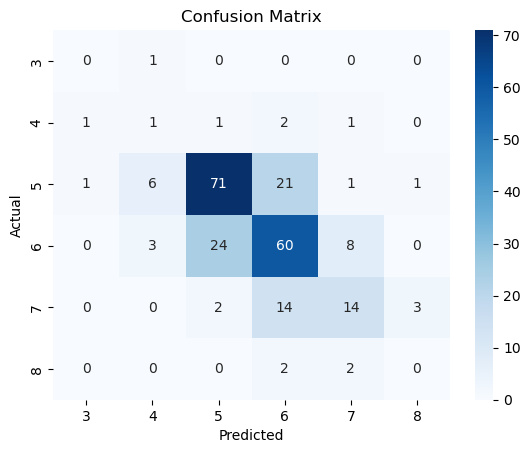

In [53]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['3', '4', '5', '6', '7', '8'], yticklabels=['3', '4', '5', '6', '7', '8'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

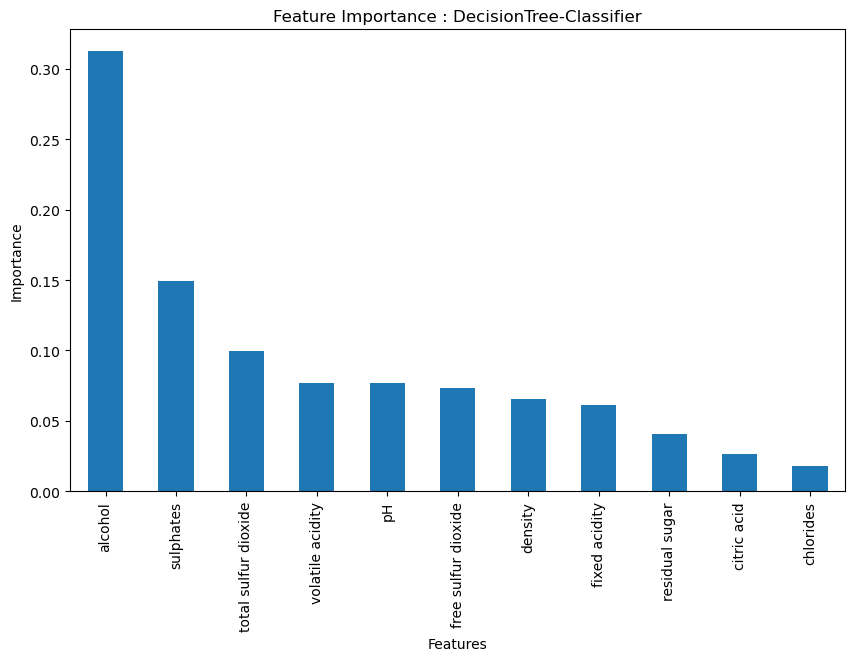

In [54]:
importances = pd.Series(wine_model.feature_importances_, index=x.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6), title='Feature Importance : DecisionTree-Classifier')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# Conclusion

Based on all of the analysis by the various models, the RandomForrest models i.e Classifiers and Regressors have the highest test accuracy. I believe the Random Forest Models gave a better result because of the robustness of the model.
Also, after analysis  I believe my model and data cleaning stil needs work, so this might be the best i can do for now.

## Save model

In [55]:
import pickle
with open('../model/wine_rmodel.pkl', 'wb') as model_file:
    pickle.dump(wine_rmodel, model_file)

## Load model

In [56]:
model = pickle.load(open('../model/wine_rmodel.pkl', 'rb'))

In [58]:
model

RandomForestClassifier(max_depth=16, min_samples_leaf=2, min_samples_split=3,
                       random_state=42)

In [63]:
model.predict([x_test.values[0]])

array([5])